<a href="https://colab.research.google.com/github/ij007/studentEnrollmentStatus/blob/master/StudentEnrollment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#StudentEnrollment

The monitoring and support of university students are considered very important at many educational institutions. In this competition, the problem is formulated as a three-category classification task (dropout, enrolled, and graduate) and the classes are coded as 0,1 and 2 in the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv('/content/drive/MyDrive/MLP Kaggle/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/MLP Kaggle/test.csv')
labels = train_df['label']
train_df.drop('label', axis=1, inplace = True)
train_df.drop('id', axis=1, inplace=True)

In [ ]:
train_df.describe().T   

,count,mean,std,min,25%,50%,75%,max
v_21,3796.0,4.817439,6.166860,3.00,3.00,3.00,4.00,61.00
v_32,3796.0,70.825606,56.110329,6.00,6.00,89.00,116.00,176.00
v_15,3796.0,11.609062,2.576362,9.00,10.00,10.00,12.00,25.00
v_4,3796.0,99.329294,45.017380,9.00,55.00,101.00,146.00,176.00
v_1,3796.0,0.911486,0.284079,0.00,1.00,1.00,1.00,1.00
v_8,3796.0,3.436249,4.577644,1.00,1.00,1.00,3.00,25.00
v_12,3796.0,18.970495,15.010042,16.00,16.00,16.00,16.00,179.00
v_25,3796.0,97.203372,79.213308,1.00,5.00,110.00,181.00,289.00
v_20,3796.0,166.138567,103.121322,6.00,60.00,168.00,251.00,322.00
v_18,3796.0,57.441254,50.416264,3.00,23.00,30.00,103.00,324.00


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3796 entries, 0 to 3795
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   v_21    3796 non-null   int64  
 1   v_32    3796 non-null   int64  
 2   v_15    3796 non-null   int64  
 3   v_4     3796 non-null   int64  
 4   v_1     3796 non-null   int64  
 5   v_8     3796 non-null   int64  
 6   v_12    3796 non-null   int64  
 7   v_25    3796 non-null   int64  
 8   v_20    3796 non-null   int64  
 9   v_18    3796 non-null   int64  
 10  v_3     3796 non-null   int64  
 11  v_11    3796 non-null   int64  
 12  v_14    3796 non-null   int64  
 13  v_26    3796 non-null   int64  
 14  v_27    3796 non-null   int64  
 15  v_30    3796 non-null   int64  
 16  v_9     3796 non-null   int64  
 17  v_31    3796 non-null   int64  
 18  v_28    3796 non-null   int64  
 19  v_13    3796 non-null   int64  
 20  v_33    3796 non-null   int64  
 21  v_17    3796 non-null   int64  
 22  

In [ ]:
train_df.corr()

,v_21,v_32,v_15,v_4,v_1,v_8,v_12,v_25,v_20,v_18,...,v_7,v_2,v_16,v_34,v_35,v_36,v_37,v_38,v_39,v_40
v_21,1.000000,0.125341,0.152866,0.010845,-0.082628,0.173957,0.005009,0.092436,0.063321,0.045850,...,0.142175,0.183248,0.142946,0.110635,0.028021,0.067447,0.045596,-0.004181,0.025268,0.144173
v_32,0.125341,1.000000,-0.101544,-0.067567,-0.212189,0.393977,0.014708,0.083641,0.059108,0.022664,...,0.120875,0.023755,-0.009407,0.015609,0.022991,0.020092,-0.010007,-0.027519,-0.015308,0.021466
v_15,0.152866,-0.101544,1.000000,0.106427,0.174848,0.201274,0.049423,-0.047147,0.000466,-0.025334,...,0.310098,0.474845,0.401445,0.323370,0.044105,0.097907,0.113922,0.068093,0.048563,0.433270
v_4,0.010845,-0.067567,0.106427,1.000000,-0.002542,-0.125510,-0.003023,0.060290,0.054272,0.014412,...,0.006965,0.048838,0.031829,0.010628,0.003208,-0.000046,0.000271,-0.011523,0.003588,0.024381
v_1,-0.082628,-0.212189,0.174848,-0.002542,1.000000,-0.026630,0.032820,-0.176909,-0.109221,-0.053203,...,0.121562,0.082110,0.086177,0.040628,-0.012059,-0.004333,0.050875,0.024371,0.010517,0.100143
v_8,0.173957,0.393977,0.201274,-0.125510,-0.026630,1.000000,0.003459,0.014339,0.007621,0.003934,...,0.280569,0.240558,0.263777,0.155882,0.056562,0.045777,0.035110,0.028536,0.008244,0.259127
v_12,0.005009,0.014708,0.049423,-0.003023,0.032820,0.003459,1.000000,-0.045093,-0.105872,0.043391,...,0.067090,0.059112,0.087043,0.058046,0.014360,0.038833,0.005084,0.000683,0.002359,0.054105
v_25,0.092436,0.083641,-0.047147,0.060290,-0.176909,0.014339,-0.045093,1.000000,0.515615,0.326622,...,-0.070153,0.032589,-0.056755,0.034691,-0.017550,0.013377,-0.002311,-0.029371,0.007368,-0.008876
v_20,0.063321,0.059108,0.000466,0.054272,-0.109221,0.007621,-0.105872,0.515615,1.000000,0.210192,...,-0.035516,0.049958,-0.032540,0.023913,0.011808,0.014547,0.003604,-0.001166,0.009233,-0.015489
v_18,0.045850,0.022664,-0.025334,0.014412,-0.053203,0.003934,0.043391,0.326622,0.210192,1.000000,...,-0.013654,0.017027,0.065337,0.023414,-0.004440,0.005139,0.013721,-0.010235,0.012098,-0.008814


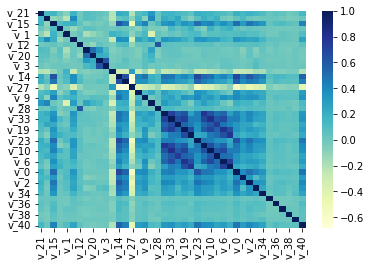

In [ ]:
sns.heatmap(train_df.corr(), cmap="YlGnBu")

In [ ]:
(labels.value_counts())

1    1863
0    1243
2     690
Name: label, dtype: int64

<BarContainer object of 3 artists>

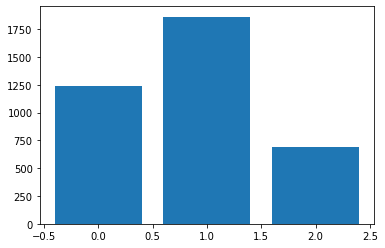

In [ ]:
plt.bar([1, 0, 2], height = list(labels.value_counts()))

In [ ]:
cat_feat = ['v_32', 'v_4', 'v_3', 'v_20', 'v_21', 'v_18', 'v_25', 'v_12', 'v_31', 'v_15', 'v_19', 'v_13', 'v_33', 'v_17', 'v_29', 'v_23', 'v_6', 'v_24', 'v_10', 'v_5', 'v_22', 'v_0']
cont_feat = ['v_16', 'v_2', 'v_8', 'v_7', 'v_34', 'v_35', 'v_36', 'v_37', 'v_38', 'v_39', 'v_40']
bin_feat = ['v_1', 'v_26', 'v_11', 'v_14', 'v_30', 'v_28', 'v_9', 'v_27']

In [ ]:
for c in bin_feat:
    print(f"{c}, {train_df[c].unique()}")

v_1, [1 0]
v_26, [0 1]
v_11, [1 0]
v_14, [0 1]
v_30, [0 1]
v_28, [0 1]
v_9, [0 1]
v_27, [1 0]


In [ ]:
train_len = len(train_df)
full_df = pd.concat([train_df, test_df])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.compose import ColumnTransformer

# cat_pipeline = Pipeline([('seletor', ColumnTransformer([('select num features', 'passthrough', cat_feat)])),
#                          ('ohe', OneHotEncoder())])

# full_pipeline = FeatureUnion(transformer_list=[('cat transformer', cat_pipeline),
#                      ('num transformer', num_pipeline)])

scaled_features = full_df.copy()

features = scaled_features[cont_feat]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
full_df[cont_feat] = features

full_df = pd.get_dummies(full_df, columns = cat_feat)

In [ ]:
#logistic
#svm
#naive bayes
#decision trees
#ensemble


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.metrics import f1_score

lr = LogisticRegression(multi_class='multinomial', class_weight='balanced')
dt = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42, class_weight='balanced')
rf = RandomForestClassifier(class_weight='balanced')
xgb_cl = xgb.XGBClassifier(objective='multi:softmax')

In [ ]:
train_transformed = full_df[:train_len]
test_transformed = full_df[train_len:]

In [ ]:
#Tranformed Dataset

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_transformed, labels, test_size=0.2, random_state=42)

In [ ]:
lr.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)
xgb_cl.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


XGBClassifier(objective='multi:softprob')

In [ ]:
print(f"lr train score: {f1_score(y_train, lr.predict(x_train), average='macro')}")
print(f"lr test score: {f1_score(y_test, lr.predict(x_test), average='macro')}")

print(f"decision tree train score: {f1_score(y_train, dt.predict(x_train), average='macro')}")
print(f"decision tree test score: {f1_score(y_test, dt.predict(x_test), average='macro')}")

print(f"random forect tree train score: {f1_score(y_train, rf.predict(x_train), average='macro')}")
print(f"random forest tree test score: {f1_score(y_test, rf.predict(x_test), average='macro')}")

print(f"xgb train score: {f1_score(y_train, xgb_cl.predict(x_train), average='macro')}")
print(f"xgb test score: {f1_score(y_test, xgb_cl.predict(x_test), average='macro')}")

lr train score: 0.6855079347848778
lr test score: 0.6201051434301124
decision tree train score: 0.9766270995076273
decision tree test score: 0.5339049562930159
random forect tree train score: 1.0
random forest tree test score: 0.5817750172434651
xgb train score: 0.7023930411251329
xgb test score: 0.59628574753279


In [ ]:
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'class_weight':['balanced', 'None']}# l1 lasso l2 ridge
logreg=LogisticRaegression(max_iter=5000)
logreg_cv=GridSearchCV(logreg,grid,cv=5, scoring='f1_macro')
logreg_cv.fit(x_train,y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2'}
accuracy : 0.6543542472845509


In [ ]:
logreg=LogisticRegression(max_iter=5000, C= 0.1, class_weight= 'balanced', penalty= 'l2')
logreg.fit(x_train, y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=5000)

In [ ]:
print(f"lr train score: {f1_score(y_train, logreg.predict(x_train), average='macro')}")
print(f"lr test score: {f1_score(y_test, logreg.predict(x_test), average='macro')}")

lr train score: 0.7699407916096934
lr test score: 0.652121212121212


In [ ]:
#Colab/kaggle crashing don't run

param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
xgb_cl = xgb.XGBClassifier(objective='multi:softmax')
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="f1_micro")
_ = grid_cv.fit(x_train, y_train)
_

In [ ]:
#Non Transformed
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_df, labels, test_size=0.2, random_state=42)

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"], 'class_weight':['balanced', 'None']}# l1 lasso l2 ridge
logreg=LogisticRegression(max_iter=5000)
logreg_cv=GridSearchCV(logreg,grid,cv=5, scoring='f1_macro')
logreg_cv.fit(x_train,y_train)

In [ ]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)



tuned hpyerparameters :(best parameters)  {'C': 1000.0, 'class_weight': 'balanced', 'penalty': 'l2'}
accuracy : 0.6599110021081155


In [ ]:
logreg=LogisticRegression(max_iter=5000, C= 1000.0, class_weight= 'balanced', penalty= 'l2')
logreg.fit(x_train, y_train)

print(f"lr train score: {f1_score(y_train, logreg.predict(x_train), average='macro')}")
print(f"lr test score: {f1_score(y_test, logreg.predict(x_test), average='macro')}")

lr train score: 0.6799624164937454
lr test score: 0.6379049245779629


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV


param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 10, 25, 50, 75, 99, 100, 1000],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}
xgb_cl = xgb.XGBClassifier(objective='multi:softmax')
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="f1_macro")
_ = grid_cv.fit(x_train, y_train)
_   

GridSearchCV(cv=3, estimator=XGBClassifier(objective='multi:softmax'),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5], 'gamma': [0, 0.25, 1],
                         'learning_rate': [0.1, 0.01, 0.05],
                         'max_depth': [3, 4, 5, 7], 'reg_lambda': [0, 1, 10],
                         'scale_pos_weight': [1, 10, 25, 50, 75, 99, 100, 1000],
                         'subsample': [0.8]},
             scoring='f1_macro')

In [ ]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.25,
 'learning_rate': 0.1,
 'max_depth': 7,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [ ]:
print("accuracy :",grid_cv.best_score_)


accuracy : 0.6615419795565262


In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(objective='multi:softmax', colsample_bytree= 0.5,
 gamma= 0.25,
 learning_rate= 0.1,
 max_depth= 7,
 reg_lambda= 0,
 scale_pos_weight= 1,
 subsample= 0.8)


In [ ]:
_ = xgb_cl.fit(train_df, labels)

In [ ]:
xgb_cl.score(x_test, y_test)

0.9960526315789474

In [ ]:

test_id = test_df['id']
test_df.drop('id', axis=1, inplace=True)
y_hat = xgb_cl.predict(test_df)
final_df = pd.DataFrame(data=[test_id, y_hat])
final_df = final_df.T
final_df.rename(columns = {'id':'id', 'Unnamed 0':'label'}, inplace = True)
final_df.to_csv('xgb.csv', index=False)

Index(['v_21', 'v_32', 'v_15', 'v_4', 'v_1', 'v_8', 'v_12', 'v_25', 'v_20',
       'v_18', 'v_3', 'v_11', 'v_14', 'v_26', 'v_27', 'v_30', 'v_9', 'v_31',
       'v_28', 'v_13', 'v_33', 'v_17', 'v_19', 'v_29', 'v_23', 'v_24', 'v_10',
       'v_5', 'v_6', 'v_22', 'v_0', 'v_7', 'v_2', 'v_16', 'v_34', 'v_35',
       'v_36', 'v_37', 'v_38', 'v_39', 'v_40'],
      dtype='object')